# Regularization

In [436]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error
import matplotlib.pyplot as plt

In [437]:
# get the data
X_data, y_data = fetch_california_housing(return_X_y=True)
X_data.shape

(20640, 8)

In [438]:
# choose a random subset of the data to increase overfitting
N=7000
np.random.seed(42)
subset_indices = np.random.choice(X_data.shape[0], size=N, replace=False)
X_data = X_data[subset_indices]
y_data = y_data[subset_indices]

In [439]:
# add polynomial features and interactions to increase complexity (and overfitting)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_data = poly.fit_transform(X_data)
X_data.shape

(7000, 164)

In [440]:
# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

print('shape of X :', X_data.shape, 'shape of Y :', y_data.shape)
print('shape of X-train :', X_train.shape, 'shape of Y-train :', y_train.shape)
print('shape of X-test :', X_test.shape, 'shape of Y-test :', y_test.shape)

shape of X : (7000, 164) shape of Y : (7000,)
shape of X-train : (4900, 164) shape of Y-train : (4900,)
shape of X-test : (2100, 164) shape of Y-test : (2100,)


# Lasso model

In [441]:
from sklearn.linear_model import Lasso

alpha = 0.1
model_lasso = Lasso(alpha=alpha)
print(model_lasso)

Lasso(alpha=0.1)


In [442]:
# train the lasso model
model_lasso.fit(X_train, y_train)

y_pred_lasso = model_lasso.predict(X_test)

/Users/nyfe/anaconda3/envs/MLCO2_test/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.383e+02, tolerance: 6.555e-01
  model = cd_fast.enet_coordinate_descent(


In [443]:
from sklearn.metrics import r2_score
print("r^2 of lasso on test data : %f" % r2_score(y_test, y_pred_lasso))
print("rmse of lasso on test data : %f" % root_mean_squared_error(y_test, y_pred_lasso))

r^2 of lasso on test data : 0.698201
rmse of lasso on test data : 0.632350


# ElasticNet model

In [444]:
from sklearn.linear_model import ElasticNet

model_elastic = ElasticNet(alpha=alpha, l1_ratio=0.3)
print(model_elastic)

ElasticNet(alpha=0.1, l1_ratio=0.3)


In [445]:
model_elastic.fit(X_train, y_train)
y_pred_elastic = model_elastic.predict(X_test)
print("r^2 on test data : %f" % r2_score(y_test, y_pred_elastic))
print("rmse on test data : %f" % root_mean_squared_error(y_test, y_pred_elastic))

r^2 on test data : 0.689710
rmse on test data : 0.641184


/Users/nyfe/anaconda3/envs/MLCO2_test/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.263e+02, tolerance: 6.555e-01
  model = cd_fast.enet_coordinate_descent(


In [446]:
# get true coefficients of linear regression on the test set
from sklearn.linear_model import LinearRegression
model_true = LinearRegression().fit(X_test, y_test)
model_true.coef_

array([-1.59845792e-04,  4.11997396e-03, -1.06020159e-03,  1.68564050e-03,
       -2.13934978e-01,  1.92908048e-03,  1.27326927e-03,  2.79371523e-04,
        1.29800583e-02, -1.16799193e-01,  9.45643540e-03,  5.82781779e-03,
       -2.83041497e-03,  1.31748481e-02, -1.08451562e-02,  1.69682667e-02,
       -9.62893661e-04,  1.44526490e-01,  5.48779737e-02, -2.17044397e-04,
       -3.94535342e-02, -1.24014673e-01, -3.29515104e-02, -9.18474323e-02,
       -1.15907969e-02,  3.70159034e-03,  8.37315215e-03,  1.27073562e-03,
        4.55621397e-02, -1.68589708e-03,  2.83253991e-02,  8.44463914e-03,
        3.93533668e-02, -1.05860825e-01, -3.53006445e-07, -3.10593269e-03,
       -6.81806890e-03, -5.44624200e-03,  3.95606856e-03,  4.40180949e-02,
       -1.22981502e-01,  7.48072083e-02, -8.17635975e-02, -3.54518817e-02,
       -4.65483312e-03, -7.95699125e-04,  2.83727260e-03, -1.09413000e-01,
       -1.53191609e-05,  4.60185586e-04, -1.57576185e-02, -6.22161314e-03,
       -1.14794515e-04,  

## linear Model without regularisation

In [447]:
model_linear = LinearRegression().fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
print("r^2 on test data : %f" % r2_score(y_test, y_pred_linear))
print("rmse on test data : %f" % root_mean_squared_error(y_test, y_pred_linear))

r^2 on test data : 0.219960
rmse on test data : 1.016616


## Compare the different Models

Text(0.5, 1.0, 'Lasso $R^2$: 0.698 \n Elastic Net $R^2$: 0.690 \nLinear $R^2$: 0.220')

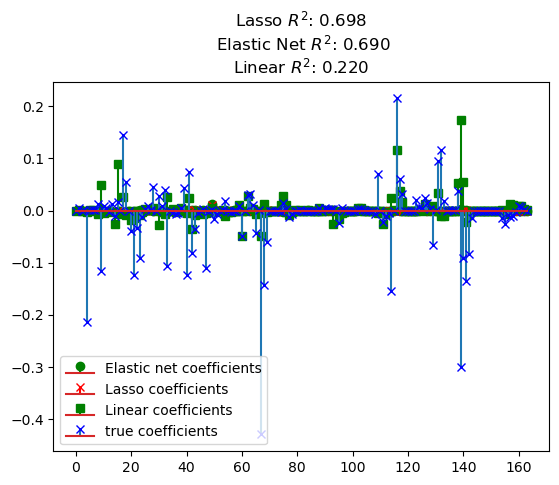

In [448]:
# Compare the coefficients of the models

# A stem plot draws lines perpendicular to a baseline
# and places a marker there.

m, s, _ = plt.stem(np.where(model_elastic.coef_)[0],
                   model_elastic.coef_[model_elastic.coef_ != 0],
                   markerfmt='bo', label='Elastic net coefficients')
plt.setp([m, s], color="green")

m, s, _ = plt.stem(np.where(model_lasso.coef_)[0],
                   model_lasso.coef_[model_lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients')
plt.setp([m, s], color='red')

m, s, _ = plt.stem(np.where(model_linear.coef_)[0],
                   model_linear.coef_[model_linear.coef_ != 0],
                   markerfmt='s', label='Linear coefficients')
plt.setp([m, s], color='green')

plt.stem(np.where(model_true.coef_)[0],
         model_true.coef_[model_true.coef_ != 0],
         label='true coefficients',
         markerfmt='bx')

plt.legend()
plt.title(f"Lasso $R^2$: %.3f \n "
          f"Elastic Net $R^2$: %.3f \n"
          f"Linear $R^2$: %.3f" % (
            r2_score(y_test, y_pred_lasso),
            r2_score(y_test, y_pred_elastic),
            r2_score(y_test, y_pred_linear)))

# Ridge regression model

In [449]:
# --->>> Your turn <<<---
# Add a Ridge regression model
# How does it compare to the others?